# << 국도교통 해커톤 - 기차역 혼잡도 분석 (미경) >>

## 1. Pakages import & Data load

In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [43]:
pd.set_option('max_columns', 24,'max_rows', 20) 
# pd.set_option('display.max_rows', None)

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### A. 교통수단 데이터

In [5]:
trans = pd.read_csv("교통수단.dat", sep='|', header=None )
columns = ["교통수단 코드", "교통수단 명"] 
trans.columns = columns
trans

,교통수단 코드,교통수단 명
0,1,시내
1,2,시외
2,3,좌석
3,4,마을
4,5,간선
5,6,지선
6,7,광역
7,8,순환
8,9,농어촌버스
9,10,공항버스


### B. 교통수단별 이용량

In [7]:
trans_us = pd.read_csv("교통수단별 이용량.dat", sep='|', header=None)
columns = ["운행 일자","시도 코드", "시군구 코드", "교통수단 코드", "이용 건수"] 
trans_us.columns = columns
trans_us

,운행 일자,시도 코드,시군구 코드,교통수단 코드,이용 건수
0,20190101,11,11000,01,682
1,20190101,11,11000,04,75
2,20190101,11,11000,05,31
3,20190101,11,11000,07,62
4,20190101,11,11000,10,45
...,...,...,...,...,...
254759,20200522,~,~,03,0
254760,20200522,~,~,04,0
254761,20200522,~,~,07,0
254762,20200522,~,~,11,0


### C. 발권 OD

In [207]:
ticket_od = pd.read_csv("발권 OD.dat", sep='|', header=None)
columns = ["년도", "년월", "운행 일자", "요일 구분", "출발 시도 코드", "출발 시군구 코드", "출발 지역 코드", "도착 시도 코드", "도착 시군구 코드",
           "도착 지역 코드", "철도 통행 인원", "시외버스 통행 인원", "고속버스 통행 인원"] 
ticket_od.columns = columns
ticket_od

,년도,년월,운행 일자,요일 구분,출발 시도 코드,출발 시군구 코드,출발 지역 코드,도착 시도 코드,도착 시군구 코드,도착 지역 코드,철도 통행 인원,시외버스 통행 인원,고속버스 통행 인원
0,2019,201901,20190101,3,11,11170,1117010700,11,11230,1123010400,7,0,0
1,2019,201901,20190101,3,11,11170,1117010700,11,11260,1126010200,6,0,0
2,2019,201901,20190101,3,11,11170,1117010700,11,11560,1156010100,17,0,0
3,2019,201901,20190101,3,11,11170,1117010700,26,26170,2617010100,6776,0,0
4,2019,201901,20190101,3,11,11170,1117010700,26,26320,2632010200,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404048,2020,202005,20200522,6,~,~,~,48,48330,4833010,0,12,0
3404049,2020,202005,20200522,6,~,~,~,48,48860,4886036,0,2,0
3404050,2020,202005,20200522,6,~,~,~,48,48860,4886038,0,2,0
3404051,2020,202005,20200522,6,~,~,~,99,99999,9999999999,0,206,0


### D. 지역코드

In [11]:
local_code = pd.read_csv("지역코드.dat", sep='|', header=None)
columns = ["지역 구분", "시도 코드", "시군구 코드", "이용 지역 코드", "시도 명", "시군구 명", "읍면동 명"] 
local_code.columns = columns
local_code

,지역 구분,시도 코드,시군구 코드,이용 지역 코드,시도 명,시군구 명,읍면동 명
0,1,11,11000,1100000000,서울특별시,서울특별시,서울특별시
1,2,11,11110,1111000000,서울특별시,종로구,종로구
2,3,11,11110,1111010100,서울특별시,종로구,청운동
3,3,11,11110,1111010200,서울특별시,종로구,신교동
4,3,11,11110,1111010300,서울특별시,종로구,궁정동
...,...,...,...,...,...,...,...
20542,3,50,50130,5013032022,제주특별자치도,서귀포시,하천리
20543,3,50,50130,5013032023,제주특별자치도,서귀포시,성읍리
20544,3,50,50130,5013032024,제주특별자치도,서귀포시,가시리
20545,3,50,50130,5013032025,제주특별자치도,서귀포시,세화리


## 2. 발권 OD 전처리

① 발권 OD의 데이터를 출발지가 서울인 곳만 포함되도록 처리하자 (출발시도코드가 11인 것들만)

In [208]:
od_1 = ticket_od[ticket_od['출발 시도 코드'] == '11']
od_1

,년도,년월,운행 일자,요일 구분,출발 시도 코드,출발 시군구 코드,출발 지역 코드,도착 시도 코드,도착 시군구 코드,도착 지역 코드,철도 통행 인원,시외버스 통행 인원,고속버스 통행 인원
0,2019,201901,20190101,3,11,11170,1117010700,11,11230,1123010400,7,0,0
1,2019,201901,20190101,3,11,11170,1117010700,11,11260,1126010200,6,0,0
2,2019,201901,20190101,3,11,11170,1117010700,11,11560,1156010100,17,0,0
3,2019,201901,20190101,3,11,11170,1117010700,26,26170,2617010100,6776,0,0
4,2019,201901,20190101,3,11,11170,1117010700,26,26320,2632010200,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394206,2020,202005,20200522,6,11,11710,1171010200,99,99999,9999999999,0,19,0
3394207,2020,202005,20200522,6,11,11710,1171010300,99,99999,9999999999,0,2,0
3394208,2020,202005,20200522,6,11,11710,1171010700,99,99999,9999999999,0,326,0
3394209,2020,202005,20200522,6,11,11710,1171010900,99,99999,9999999999,0,355,0


② 나는 기차를 볼 것이기 때문에 철도 통행 인원만 보자. (이외에 필요한 컬럼을 제외하고 드롭)

In [213]:
od_2 = od_1[['운행 일자', '요일 구분', '철도 통행 인원']]
od_2

,운행 일자,요일 구분,철도 통행 인원
0,20190101,3,7
1,20190101,3,6
2,20190101,3,17
3,20190101,3,6776
4,20190101,3,21
...,...,...,...
3394206,20200522,6,0
3394207,20200522,6,0
3394208,20200522,6,0
3394209,20200522,6,0


③ 발권 OD의 데이터를 운행일자를 2019.01.01 ~ 2019.05.31과 2020.01.01 ~ 2020.05.31로 나누자

In [217]:
#2020년 데이터만 모아놓은 것
od_20 = od_2[od_2['운행 일자'] > 20200000]
od_20

,운행 일자,요일 구분,철도 통행 인원
1808899,20200101,4,292
1808907,20200101,4,0
1808941,20200101,4,298
1808945,20200101,4,54
1808978,20200101,4,7
...,...,...,...
3394206,20200522,6,0
3394207,20200522,6,0
3394208,20200522,6,0
3394209,20200522,6,0


In [218]:
od_19 = od_2[od_2['운행 일자'] < 20190601]
od_19

,운행 일자,요일 구분,철도 통행 인원
0,20190101,3,7
1,20190101,3,6
2,20190101,3,17
3,20190101,3,6776
4,20190101,3,21
...,...,...,...
1797870,20190523,5,0
1797871,20190523,5,0
1797872,20190523,5,0
1797873,20190523,5,0


④ 숫자로 표현되어 있는 운행 일자를 datetime 형태로 변환

In [219]:
od_20.reset_index(drop=True, inplace=True)
od_19.reset_index(drop=True, inplace=True)

In [220]:
import datetime

In [221]:
def to_datetime(series):
    date = []
    for i in range(len(series)):
         date.append(datetime.datetime.strptime(series[i].astype(str), "%Y%m%d").date())
    return date

In [222]:
od_20['운행 일자'] = pd.DataFrame(to_datetime(od_20['운행 일자']))
od_19['운행 일자'] = pd.DataFrame(to_datetime(od_19['운행 일자']))

<ipython-input-222-bf21076e380f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od_20['운행 일자'] = pd.DataFrame(to_datetime(od_20['운행 일자']))
<ipython-input-222-bf21076e380f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od_19['운행 일자'] = pd.DataFrame(to_datetime(od_19['운행 일자']))


⑤ 요일 구분을 보기 편하게 숫자에서 문자로 바꾸자.

In [248]:
def weekday_categorize(num):
    if num == 1:
        return "일"
    elif num == 2:
        return "월"
    elif num == 3:
        return "화"
    elif num == 4:
        return "수"
    elif num == 5:
        return "목"
    elif num == 6:
        return "금"
    else:
        return "토"

od_20['요일 구분'] = od_20['요일 구분'].apply(weekday_categorize)
od_19['요일 구분'] = od_19['요일 구분'].apply(weekday_categorize)

<ipython-input-248-463e5365010d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od_20['요일 구분'] = od_20['요일 구분'].apply(weekday_categorize)
<ipython-input-248-463e5365010d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od_19['요일 구분'] = od_19['요일 구분'].apply(weekday_categorize)


### 전처리를 끝낸 최종 데이터셋 OD_19 / OD_29

In [249]:
#출발지역이 서울인, 2019.01.01~2019.05.31 사이 철도 통행 인원
od_19

,운행 일자,요일 구분,철도 통행 인원
0,2019-01-01,화,7
1,2019-01-01,화,6
2,2019-01-01,화,17
3,2019-01-01,화,6776
4,2019-01-01,화,21
...,...,...,...
116907,2019-05-23,목,0
116908,2019-05-23,목,0
116909,2019-05-23,목,0
116910,2019-05-23,목,0


In [250]:
#출발지역이 서울인, 2020.01.01~2020.05.31 사이 철도 통행 인원
od_20

,운행 일자,요일 구분,철도 통행 인원
0,2020-01-01,수,292
1,2020-01-01,수,0
2,2020-01-01,수,298
3,2020-01-01,수,54
4,2020-01-01,수,7
...,...,...,...
116599,2020-05-22,금,0
116600,2020-05-22,금,0
116601,2020-05-22,금,0
116602,2020-05-22,금,0


## 3. 발권 OD에서 인사이트 추출

### A. 운행일자별 데이터 개수 확인

In [230]:
od_19['운행 일자'].value_counts().sort_index()

2019-01-01    775
2019-01-02    782
2019-01-03    760
2019-01-04    786
2019-01-05    773
             ... 
2019-05-27    777
2019-05-28    772
2019-05-29    760
2019-05-30    766
2019-05-31    795
Name: 운행 일자, Length: 151, dtype: int64

In [232]:
len(od_19['운행 일자'].value_counts().sort_index())
#원래 여객 데이터에서 본 것과 같이, 2019.01.01 ~ 2019.05.31 사이의 151개 날짜에서 약 780개의 데이터가 수집되고 있는 것을 볼 수 있다.

151

In [226]:
od_20['운행 일자'].value_counts().sort_index()

2020-01-01    819
2020-01-02    856
2020-01-03    848
2020-01-04    819
2020-01-05    814
             ... 
2020-05-27    752
2020-05-28    759
2020-05-29    781
2020-05-30    734
2020-05-31    749
Name: 운행 일자, Length: 152, dtype: int64

In [233]:
len(od_20['운행 일자'].value_counts())
#원래 여객 데이터와 같이 2020.01.01 ~ 2020.05.31 사이의 152개 날짜에서 약 800개씩 데이터가 수집되고 있는 것을 볼 수 있다.

152

생각보다 뽑아낼 수 있는 인사이트가 없다. 날짜별로 sum하여 일자별 철도 통행량을 구한뒤에, 전에 했던 것처럼 요일별로 철도 통행량이 어느정도인지 보는 수 밖에..

### B. 일자별 철도 통행량

In [237]:
od_20_day = od_20['철도 통행 인원'].groupby(od_20['운행 일자']).sum()
od_day_df = pd.DataFrame(od_20_day)

In [238]:
od_day_df

,철도 통행 인원
운행 일자,
2020-01-01,91891
2020-01-02,94261
2020-01-03,115303
2020-01-04,128007
2020-01-05,107205
...,...
2020-05-27,62544
2020-05-28,67336
2020-05-29,91150


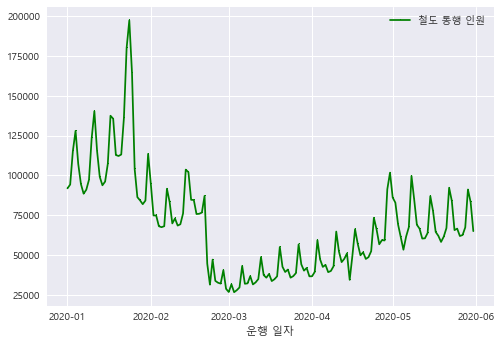

In [239]:
od_day_df.plot(color='green', marker=',')
plt.show()

보아하니 코로나 시작 이후로 철도 통행량이 감소했다가 점차 회복되는 중인 것으로 보인다.  
또 지그재그인 것을 보니 주간과 주말 철도이용량의 차이가 예상된다.

### 2019년 동일 기간과 비교해보기

2019.01.01 ~ 2019.05.31 사이 그래프를 그려보자

In [242]:
od_19_day = od_19['철도 통행 인원'].groupby(od_19['운행 일자']).sum()
od_day_df2 = pd.DataFrame(od_19_day)

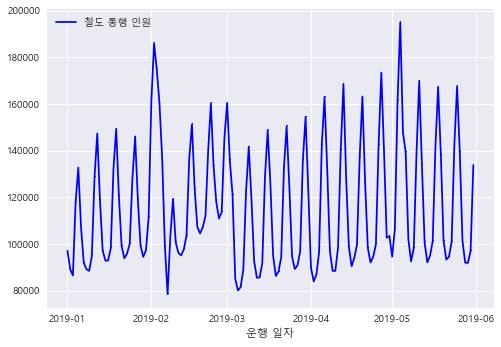

In [243]:
od_day_df2.plot(color='blue', marker=',')
plt.show()

### **< 2019년 vs 2020년 철도 통행량 비교 >**
축 범위를 맞추어서 비교해보자

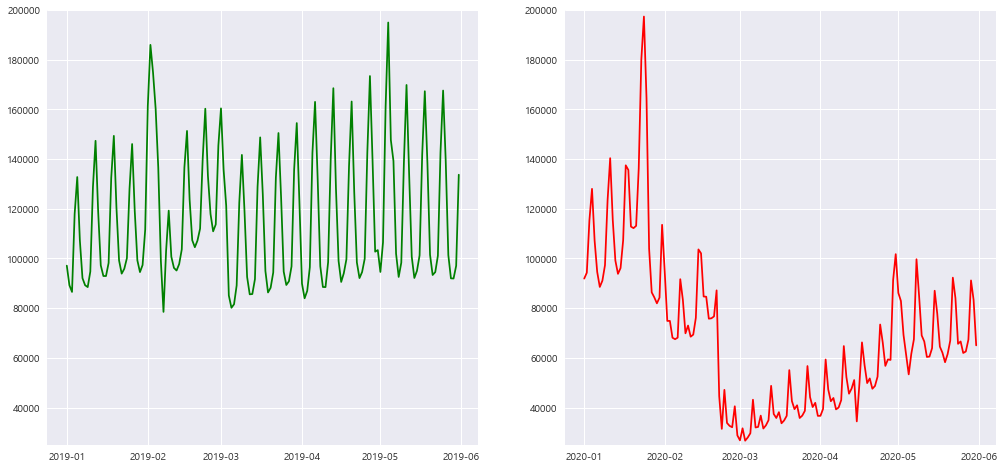

In [203]:
fig = plt.figure(figsize=(17,8))

#2019년 데이터
ax1 = fig.add_subplot(1,2,1)
plt.plot(od_19_df.index, od_19_df.values, color='green')
plt.ylim(25000, 200000)

#2020년 데이터
ax2 = fig.add_subplot(1,2,2)
plt.plot(ticket_day.index, ticket_day.values, color='red')
plt.ylim(25000, 200000)

plt.show()

코로나 발생 이후 철도 운행 이용량이 확연히 감소한 것을 확인할 수 있으며  
2월 중순, 코로나가 터진 이후로 급격하게 감소했던 철도 통행량이 점점 증가하는 추세를 보이고 있다.  
요일별 평균의 차이가 2019년도보다 2020년도에서 더 적은 것으로 추측된다.

### B. 요일별 평균 통행량 확인해보기

In [253]:
od_19

,운행 일자,요일 구분,철도 통행 인원
0,2019-01-01,화,7
1,2019-01-01,화,6
2,2019-01-01,화,17
3,2019-01-01,화,6776
4,2019-01-01,화,21
...,...,...,...
116907,2019-05-23,목,0
116908,2019-05-23,목,0
116909,2019-05-23,목,0
116910,2019-05-23,목,0


In [254]:
od_20

,운행 일자,요일 구분,철도 통행 인원
0,2020-01-01,수,292
1,2020-01-01,수,0
2,2020-01-01,수,298
3,2020-01-01,수,54
4,2020-01-01,수,7
...,...,...,...
116599,2020-05-22,금,0
116600,2020-05-22,금,0
116601,2020-05-22,금,0
116602,2020-05-22,금,0


In [255]:
od_amt_20 =od_20.groupby(['요일 구분']).mean()['철도 통행 인원']
od_amt_20

요일 구분
금    111.248734
목     89.179968
수     81.535088
월     81.830833
일     83.924485
토    102.506789
화     76.648170
Name: 철도 통행 인원, dtype: float64

In [256]:
od_amt_19 =od_19.groupby(['요일 구분']).mean()['철도 통행 인원']
od_amt_19

요일 구분
금    172.702302
목    130.288150
수    122.029204
월    133.492111
일    166.008925
토    200.863090
화    124.150845
Name: 철도 통행 인원, dtype: float64

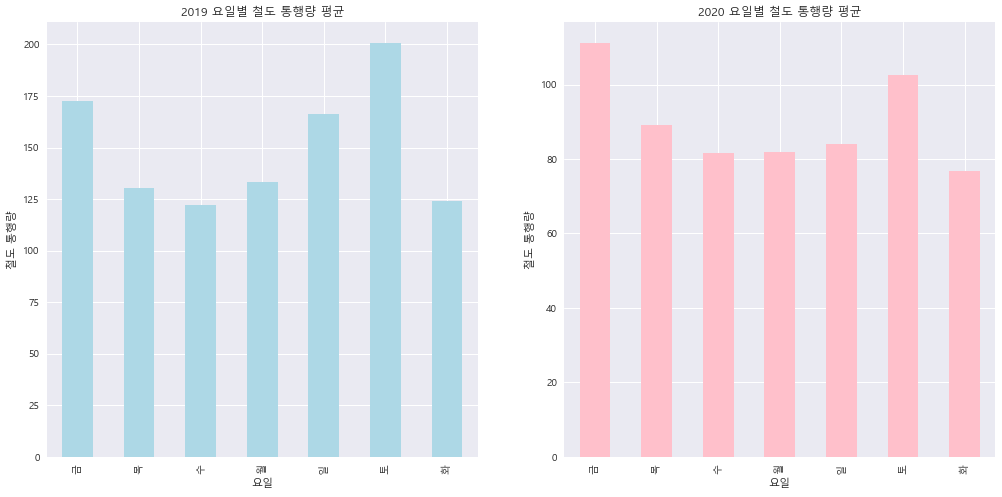

In [266]:
fig = plt.figure(figsize=(17,8))

#2019년 데이터
ax1 = fig.add_subplot(1,2,1)
od_amt_19.plot(kind='bar', color='lightblue')
plt.title("2019 요일별 철도 통행량 평균")
plt.xlabel("요일")
plt.ylabel("철도 통행량")

#2020년 데이터
ax2 = fig.add_subplot(1,2,2)
od_amt_20.plot(kind='bar', color='pink')
plt.title("2020 요일별 철도 통행량 평균")
plt.xlabel("요일")
plt.ylabel("철도 통행량")
plt.show()

왜 이런지 아는 사람? 2019년에 비해 금요일 철도 통행량이 증가했고, 
전반적으로 스무스해진 느낌인데 명확하게 왜 그런진 잘 모르겠다.